# Exploring the SF City Salary Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [3]:
SFSalaryDF=pd.read_csv("../input/sf-salaries/Salaries.csv",low_memory=False)

In [4]:
SFSalaryDF.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [52]:
SFSalaryDF.shape

(148654, 13)

In [18]:
for col in list(SFSalaryDF.columns.values):
    print("Column Name: ")
    print(col)
    print(SFSalaryDF[col].value_counts())

Column Name: 
Id
2047      1
81293     1
138601    1
136552    1
44351     1
42302     1
48445     1
46396     1
36155     1
34106     1
40249     1
38200     1
60727     1
58678     1
64821     1
62772     1
52531     1
132458    1
134507    1
144748    1
97669     1
69003     1
66954     1
73097     1
71048     1
93575     1
91526     1
95620     1
146797    1
85379     1
         ..
62155     1
64202     1
58057     1
37575     1
10960     1
39622     1
33477     1
35524     1
45763     1
47810     1
41665     1
53967     1
8913      1
107233    1
31450     1
109280    1
21215     1
23262     1
17117     1
19164     1
29403     1
25305     1
15058     1
27352     1
4823      1
6870      1
725       1
2772      1
13011     1
2049      1
Name: Id, dtype: int64
Column Name: 
EmployeeName
Kevin Lee                 13
William Wong              11
Richard Lee               11
Steven Lee                11
KEVIN LEE                  9
John Chan                  9
Stanley Lee                

In [15]:
SFSalaryDF.columns.values

array(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay',
       'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year',
       'Notes', 'Agency', 'Status'], dtype=object)

In [19]:
def preprocessing(DF):
    
    column_names=list(DF.columns.values)

In [26]:
def column_Data_types(DF):
    objectcol=[]
    numcol=[]
    for col in DF.columns.values:
        if DF[col].dtypes == 'object' :
            objectcol.append(col)
        else:
            numcol.append(col)
    return objectcol,numcol

In [27]:
object_col, num_col=column_Data_types(SFSalaryDF)

In [28]:
print(object_col)

['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Agency', 'Status']


In [31]:
print(num_col)

['Id', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes']


<h3> Using Box Plot for finding Outliers </h3>

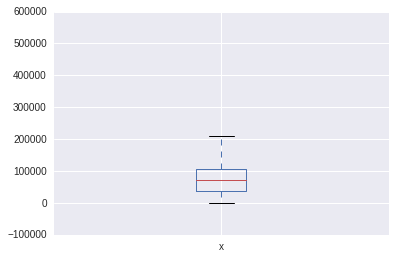

In [46]:
_, bp = pd.DataFrame.boxplot(SFSalaryDF["TotalPay"], return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

Print the outliers of Total Pay columns

In [48]:
print(outliers)

[array([ 567595.43,  538909.28,  335279.91, ...,  211724.08,  211029.94,
        212535.9 ])]


Count number of outliers present in following columns

In [50]:
print(len(outliers[0]))

1286


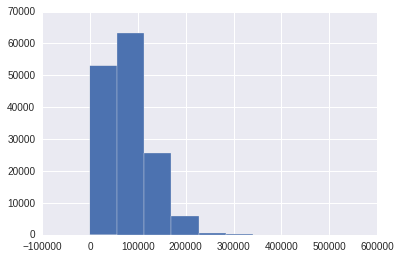

In [53]:
SFSalaryDF.TotalPay.hist()

In [54]:
SFSalaryDF.Year.value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

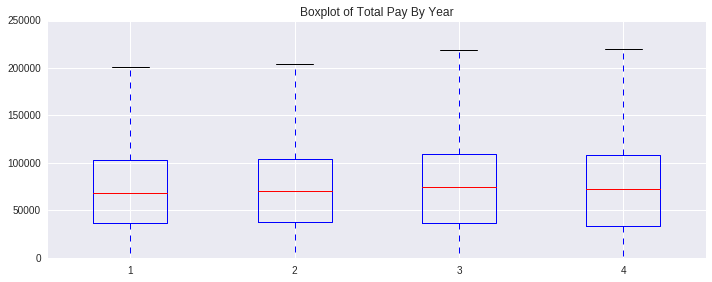

In [55]:
year2011 = SFSalaryDF[SFSalaryDF.Year == 2011]
year2012 = SFSalaryDF[SFSalaryDF.Year == 2012]
year2013 = SFSalaryDF[SFSalaryDF.Year == 2013]
year2014 = SFSalaryDF[SFSalaryDF.Year == 2014]

plt.figure(figsize=(10,4))
ax = plt.boxplot([year2011.TotalPay, year2012.TotalPay, year2013.TotalPay, year2014.TotalPay])
plt.ylim(0, 250000)
plt.title('Boxplot of Total Pay By Year')
plt.tight_layout()